In [33]:
import pickle
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sys
import os
from collections import defaultdict
import re
import json
from collections import Counter
import dateutil
from dateutil import parser
from collections import defaultdict
from __future__ import division
import datetime
%pylab inline
from numpy import arange
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [34]:
def parseint(string):
    string = str(string)
    return int(''.join([x for x in string if x.isdigit()]))

In [35]:
with open('movie_info_revised.p' ,'r') as picklefile:
    data = pickle.load(picklefile)

In [36]:
def date_helper(date):
    try:
        date = parser.parse(date)
        return True
    except: 
        pass
    return False

In [37]:
history_keys_dic = defaultdict(dict)
for key in data.keys():
    if 'Musical' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_keys_dic['count'][year]= history_keys_dic['count'].get(year, 0) + 1  
history_df = pd.DataFrame.from_dict(history_keys_dic)
start = pd.datetime(1980, 1, 1)
end = pd.datetime(2016, 1, 1)
x = pd.date_range(start, end, freq='A').year
history_df_years = history_df.reindex(x)
history_df = history_df_years.fillna(0)
history_df['rolling mean']=pd.rolling_mean(history_df['count'], 5).shift(+1)
history_df['difference from mean']=history_df['count']/history_df['rolling mean']

In [38]:
history_keys_dic

defaultdict(<type 'dict'>, {'count': {1973: 7, 1974: 2, 1975: 4, 1977: 2, 1978: 2, 1979: 3, 1980: 3, 1981: 1, 1982: 7, 1983: 2, 1984: 3, 1985: 4, 1986: 4, 1987: 2, 1989: 1, 1990: 2, 1992: 3, 1993: 2, 1994: 1, 1995: 1, 1996: 2, 1997: 1, 1999: 1, 2000: 2, 2001: 3, 2002: 1, 2003: 4, 2005: 5, 2006: 3, 2007: 2, 2008: 3, 2009: 1, 2010: 1, 2011: 1, 2012: 2, 2014: 3, 2016: 1}})

In [39]:
history_df

,count,rolling mean,difference from mean
1980,3,NaN,NaN
1981,1,NaN,NaN
1982,7,NaN,NaN
1983,2,NaN,NaN
1984,3,NaN,NaN
1985,4,3.2,1.250000
1986,4,3.4,1.176471
1987,2,4.0,0.500000
1988,0,3.0,0.000000
1989,1,2.6,0.384615


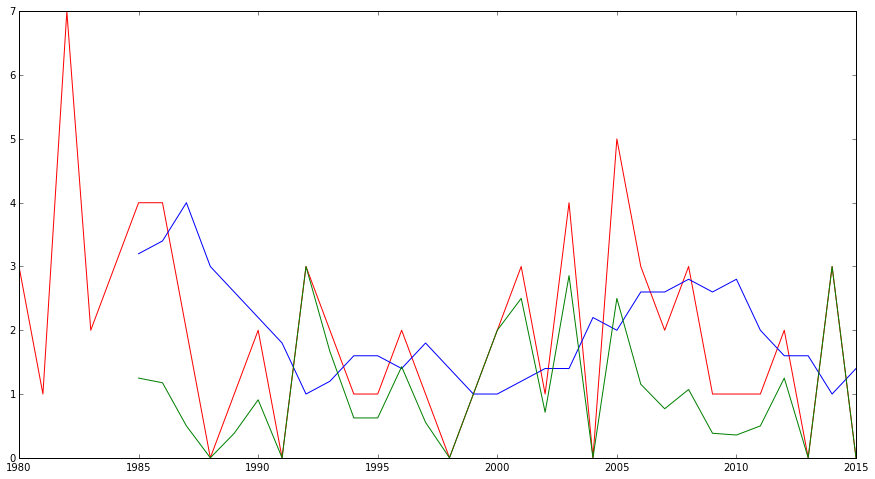

In [40]:
df = history_df.reset_index()
count = df['count']
rolling_mean = df['rolling mean']
difference_mean = df['difference from mean']
date = df['index']
cutoff = 1.5
figure(figsize=(15,8))
# red dashes, blue squares and green triangles
plt.plot(date, count, 'r-', date, rolling_mean, 'b-', date, difference_mean, 'g-')
plt.show()

In [22]:
history_dic = defaultdict(dict)
for key in data.keys():
    if 'Musical' in data[key]['genre']:
        if date_helper(data[key]['date']):
            year = parser.parse(data[key]['date']).year
            history_dic[year][key]= defaultdict(dict)
            history_dic[year][key]['date']= data[key]['date']
            history_dic[year][key]['screens']= data[key]['screens']
            history_dic[year][key]['opening']= data[key]['opening']
                #space_dic['space'][year].append(key,)

In [11]:
history_dic

defaultdict(<type 'dict'>, {1973: {'Godspell': defaultdict(<type 'dict'>, {'date': '24 August 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Man of La Mancha': defaultdict(<type 'dict'>, {'date': '8 September 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Jesus Christ Superstar': defaultdict(<type 'dict'>, {'date': '15 August 1973', 'screens': 'Error', 'opening': 'N/A'}), "Charlotte's Web": defaultdict(<type 'dict'>, {'date': '1 March 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Abhimaan': defaultdict(<type 'dict'>, {'date': '27 July 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Lost Horizon': defaultdict(<type 'dict'>, {'date': '17 March 1973', 'screens': 'Error', 'opening': 'N/A'}), 'Tom Sawyer': defaultdict(<type 'dict'>, {'date': '15 March 1973', 'screens': 'Error', 'opening': 'N/A'})}, 1974: {'Mame': defaultdict(<type 'dict'>, {'date': '27 March 1974', 'screens': 'Error', 'opening': 'N/A'}), 'Son of Dracula': defaultdict(<type 'dict'>, {'date': '19 April 1974', 'screens': '

In [12]:
def makedf(genre):
    frames = []
    years = []
    for year, movies in genre.items():
        years.append(year)
        frames.append(pd.DataFrame.from_dict(movies, orient='index'))
    genre = pd.concat(frames, keys=years)
    genre = genre[genre.screens != 'N/A']
    genre = genre[genre.screens != 'n/a']
    genre = genre[genre.screens != 'Error']
    genre = genre[genre.opening != 'N/A']
    genre = genre[genre.screens != '']
    genre = genre[genre.opening != '']
    genre = genre[genre.opening != 'n/a']
    genre = genre[genre.opening != 'Error']
    genre['opening'] = genre['opening'].map(lambda x: parseint(x))
    genre['screens'] = genre['screens'].map(lambda x: parseint(x))
    genre['date'] = genre['date'].map(lambda x: parser.parse(x))
    genre['normalized_opening']= genre['opening']/genre['screens']
    genre = genre[genre.normalized_opening < 20000]
    return genre

In [13]:
genre=makedf(history_dic)
pd.set_option('display.max_rows', 1000)
genre1 = genre[genre.screens > 50]
genre1 = genre1.reset_index()
genre1

,level_0,level_1,date,screens,opening,normalized_opening
0,1978,Grease,1978-06-16,862,8941717,10373.221578
1,1980,Xanadu,1980-08-08,249,1471595,5910.020080
2,1982,Grease 2,1982-06-11,1250,4645411,3716.328800
3,1982,Heidi's Song,1982-11-19,982,1416713,1442.681263
4,1982,The Best Little Whorehouse in Texas,1982-07-23,1400,11874268,8481.620000
5,1982,The Pirate Movie,1982-08-06,757,2528133,3339.673712
6,1983,The Meaning of Life,1983-03-31,257,1987000,7731.517510
7,1983,The Pirates of Penzance,1983-02-18,91,255496,2807.648352
8,1984,Breakin' 2: Electric Boogaloo,1984-12-21,707,2921030,4131.584158
9,1984,Purple Rain,1984-07-27,917,7766201,8469.139586


In [14]:
trend = genre1[25:42]

trend

,level_0,level_1,date,screens,opening,normalized_opening
25,2003,From Justin to Kelly,2003-06-20,2001,2715848,1357.245377
26,2005,Rent,2005-11-23,2433,10016021,4116.736950
27,2006,Idlewild,2006-08-25,973,5745780,5905.220966
28,2007,Across the Universe,2007-10-12,954,3824988,4009.421384
29,2007,Sweeney Todd: The Demon Barber of Fleet Street,2007-12-21,1249,9300805,7446.601281
30,2008,Mamma Mia!,2008-07-18,2976,27751240,9325.013441
31,2008,Step Up 2: The Streets,2008-02-14,2470,18908826,7655.395142
32,2010,Standing Ovation,2010-07-16,623,343125,550.762440
33,2011,The Muppets,2011-11-23,3440,29239026,8499.716860
34,2012,Rock of Ages,2012-06-15,3470,14437269,4160.596254


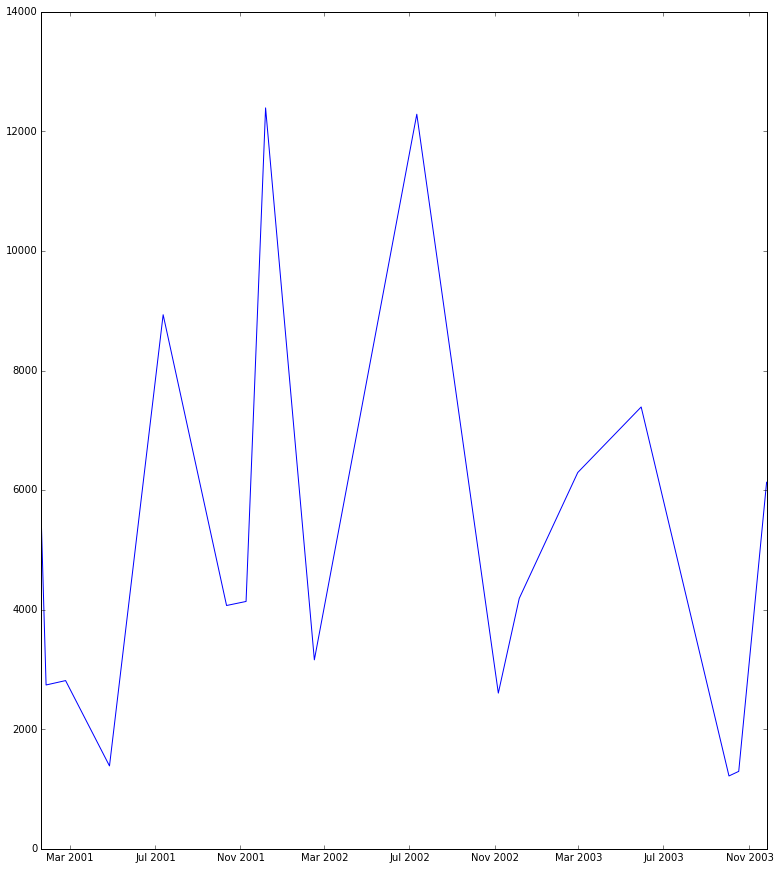

In [25]:
figure(figsize=(13,15))
trend = trend.sort(['date'])
plt.plot(trend['date'], trend['normalized_opening'])

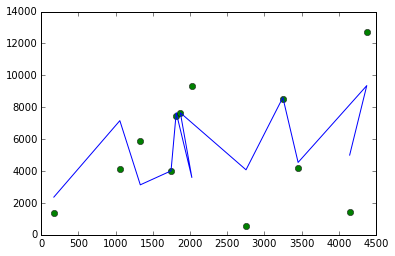

In [28]:
trend['time_delta']=trend['date'].apply(lambda x: str(x - parser.parse('2001-01-01')))
trend['time_delta_num'] = trend['time_delta'].str.replace(r'days[\s\S]+', '').apply(lambda x: int(x))

def sort_season(x):
    if x in [11, 12, 1]:
        return 'Winter'
    if x in [5, 6, 7, 8]:
        return 'Summer'
    if x in [9, 10,]:
        return 'Fall'
    if x in [2, 3, 4,]:
        return 'Spring'

trend['season']=trend['date'].apply(lambda x: sort_season(x.month))
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#plot_data = trend
y, X = dmatrices('normalized_opening ~ time_delta_num + season ', data = trend, return_type= 'dataframe')
model = sm.OLS(y, X)
fitted = model.fit()
plot(X['time_delta_num'], y, 'go')
plot(X['time_delta_num'], fitted.fittedvalues, 'b')



In [29]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     normalized_opening   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1.218
Date:                Thu, 08 Oct 2015   Prob (F-statistic):              0.384
Time:                        19:31:36   Log-Likelihood:                -111.85
No. Observations:                  12   AIC:                             233.7
Df Residuals:                       7   BIC:                             236.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         2853.1741   3841.407      0.743      0.482     -6230.309  1.19e+04
season[T.Spring]  3563.1480   5005.429      0.712      0.500     -8272.811  1.54e+04
season[T.Summer]  -601.0855   3852.956     -0.156      0.880     -9711.878  8509.707
season[T.Winter]  3605.4613   4027.268      0.895      0.400     -5917.513  1.31e+04
time_delta_num       0.6626      0.857      0.773      0.465        -1.363     2.688
==============================================================================
Omnibus:                        1.118   Durbin-Watson:                   2.287
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.662
Skew:                           0.542   Prob(JB):                        0.718
Kurtosis:                       2.614   Cond. No.                     1.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#trend = trend.reset_index()
with open('musicals_df.p', 'w') as picklefile:
    pickle.dump(trend, picklefile)

In [32]:
trend

,index,level_0,level_1,date,screens,opening,normalized_opening,time_delta,time_delta_num,season
0,25,2003,From Justin to Kelly,2003-06-20,2001,2715848,1357.245377,170 days 00:00:00,170,Summer
1,26,2005,Rent,2005-11-23,2433,10016021,4116.736950,1057 days 00:00:00,1057,Winter
2,27,2006,Idlewild,2006-08-25,973,5745780,5905.220966,1332 days 00:00:00,1332,Summer
3,28,2007,Across the Universe,2007-10-12,954,3824988,4009.421384,1745 days 00:00:00,1745,Fall
4,29,2007,Sweeney Todd: The Demon Barber of Fleet Street,2007-12-21,1249,9300805,7446.601281,1815 days 00:00:00,1815,Winter
5,30,2008,Mamma Mia!,2008-07-18,2976,27751240,9325.013441,2025 days 00:00:00,2025,Summer
6,31,2008,Step Up 2: The Streets,2008-02-14,2470,18908826,7655.395142,1870 days 00:00:00,1870,Spring
7,32,2010,Standing Ovation,2010-07-16,623,343125,550.762440,2753 days 00:00:00,2753,Summer
8,33,2011,The Muppets,2011-11-23,3440,29239026,8499.716860,3248 days 00:00:00,3248,Winter
9,34,2012,Rock of Ages,2012-06-15,3470,14437269,4160.596254,3453 days 00:00:00,3453,Summer
